19 22
weights type: flat 2.0,  86.36 %
13 22
weights type: flux 2.0,  59.09 %
14 22
weights type: DL 2.0,  63.64 %
19 22
weights type: inv_flux 2.0,  86.36 %
10 22
weights type: flat 2.5,  45.45 %
2 22
weights type: flux 2.5,  9.09 %
8 22
weights type: inv flux 2.5,  36.36 %
4 22
weights type: DL 2.5,  18.18 %


/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


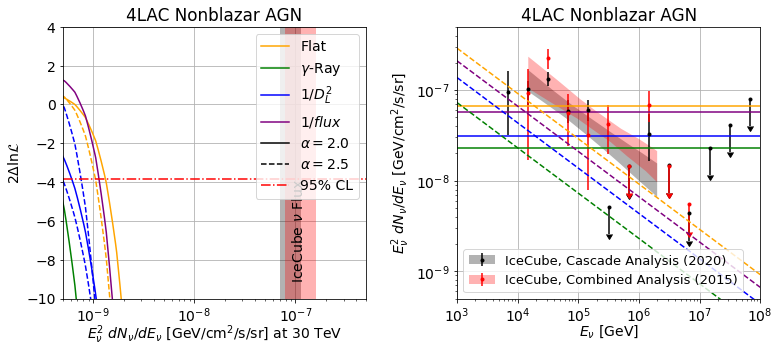

/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


22 22
weights type: flat 2.0,  100.0 %
21 22
weights type: flux 2.0,  95.45 %
20 22
weights type: DL 2.0,  90.91 %
21 22
weights type: inv_flux 2.0,  95.45 %
17 22
weights type: flat 2.5,  77.27 %
14 22
weights type: flux 2.5,  63.64 %
14 22
weights type: inv flux 2.5,  63.64 %
12 22
weights type: DL 2.5,  54.55 %


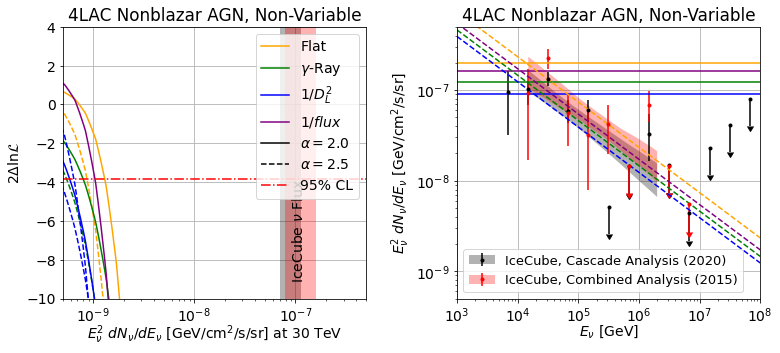

6 22
weights type: flat 2.0,  27.27 %
0 22
weights type: flux 2.0,  0.0 %
0 22
weights type: DL 2.0,  0.0 %
3 22
weights type: inv_flux 2.0,  13.64 %
0 22
weights type: flat 2.5,  0.0 %
0 22
weights type: flux 2.5,  0.0 %
0 22
weights type: inv flux 2.5,  0.0 %
0 22
weights type: DL 2.5,  0.0 %


/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


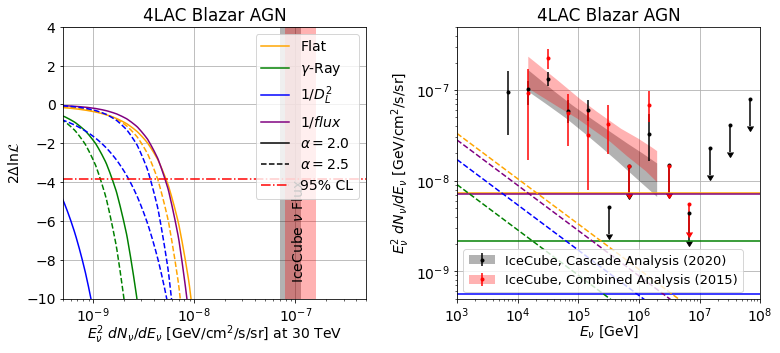

3 22
weights type: flat 2.0,  13.64 %
3 22
weights type: flux 2.0,  13.64 %
0 22
weights type: DL 2.0,  0.0 %
3 22
weights type: inv_flux 2.0,  13.64 %
0 22
weights type: flat 2.5,  0.0 %
0 22
weights type: flux 2.5,  0.0 %
0 22
weights type: inv flux 2.5,  0.0 %
0 22
weights type: DL 2.5,  0.0 %


/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


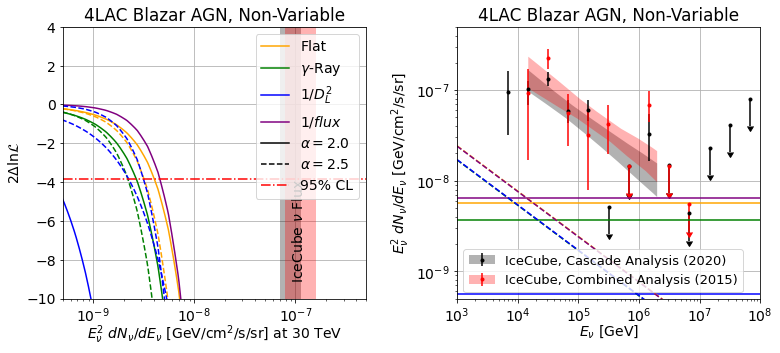

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.interpolate
import scipy.integrate
from scipy.optimize import curve_fit


matplotlib.rcParams.update({'font.size': 14})


def resample(data):
    x, y = data["flux_span"], data["results"]
    f = scipy.interpolate.interp1d(x, y, kind='linear', bounds_error=False, fill_value=(0, -200.0))
    x_new = np.linspace(np.min(x), np.max(x), 100000)
    y_new = f(x_new)
    return x_new, y_new


def expfunction(x,a,b):
    return a * np.power(x, b)

def myComplexFunc(x, a, b, c,d):
    return a * np.power(b, d*x) + c




def limit_plot(flux_span, results, completeness, alpha):

    E1 = 100.0e3  # GeV
    E2 = 30.0e3  # GeV

    f = scipy.interpolate.interp1d(flux_span, results,
                                   kind='linear', bounds_error=False, fill_value="extrapolate")
    flux_span_new = np.power(10.0, np.linspace(np.log10(np.min(flux_span)), np.log10(np.max(flux_span)), 1000))
    flux_limit = flux_span_new[np.argmin(np.abs(f(flux_span_new) + 3.84))]

    flux_limit *= completeness

    Enu = np.power(10.0, np.arange(3, 9))# GeV
    E2nudNdE = np.power(Enu, 2.0) * flux_limit / np.power(E1 / E2, alpha) / np.power(E2, 2.0) * np.power(E1 / Enu, alpha)
    return Enu, E2nudNdE


def main():

    ######################################
    # Declare variables for file names #
    ######################################    
    
    
    #np.savez("./processed_data/output_analysis_%s_%s_alpha%.1f_%s_limit.npz" % (output_file_preamble[i_source_class_names], cut_type[i_var_cut_types], alpha, weights_type),
    
    
    output_file_preamble= ['nonblazar','blazar']
    cut_types = ['Nocut','non_var']
    alphas = [2.0, 2.5]
    weights_types = ['flat', 'flux', 'dist','inv_flux']
    title = ['Nonblazar', 'Blazar']
    var=['',', Non-Variable']
    
    
    ######################################
    # Load pre-computed likelihoods Data #
    ######################################


    for i_output_file_preamble, output_file_preambles in enumerate(output_file_preamble):

        for i_cut_types, cut_type in enumerate(cut_types):
             
            data_all_flat = np.load("./processed_data/limit_analysis_data/output_analysis_%s_%s_alpha2.0_flat_limit.npz" % (output_file_preamble[i_output_file_preamble], cut_types[i_cut_types]), allow_pickle=True)
            all_flux_span_flat, all_results_flat = resample(data_all_flat)

            data_all_flat = np.load("./processed_data/limit_analysis_data/output_analysis_%s_%s_alpha2.5_flat_limit.npz" % (output_file_preamble[i_output_file_preamble], cut_types[i_cut_types]), allow_pickle=True)
            all_flux_span_flat_25, all_results_flat_25 = resample(data_all_flat)

            data_all_flux = np.load("./processed_data/limit_analysis_data/output_analysis_%s_%s_alpha2.0_flux_limit.npz" % (output_file_preamble[i_output_file_preamble], cut_types[i_cut_types]), allow_pickle=True)
            all_flux_span_flux, all_results_flux = resample(data_all_flux)

            data_all_flux = np.load("./processed_data/limit_analysis_data/output_analysis_%s_%s_alpha2.5_flux_limit.npz" % (output_file_preamble[i_output_file_preamble], cut_types[i_cut_types]), allow_pickle=True)
            all_flux_span_flux_25, all_results_flux_25 = resample(data_all_flux)

            data_all_DL = np.load("./processed_data/limit_analysis_data/output_analysis_%s_%s_alpha2.0_dist_limit.npz" % (output_file_preamble[i_output_file_preamble], cut_types[i_cut_types]), allow_pickle=True)
            all_flux_span_DL, all_results_DL = resample(data_all_DL)

            data_all_DL = np.load("./processed_data/limit_analysis_data/output_analysis_%s_%s_alpha2.5_dist_limit.npz" % (output_file_preamble[i_output_file_preamble], cut_types[i_cut_types]), allow_pickle=True)
            all_flux_span_DL_25, all_results_DL_25 = resample(data_all_DL)

            data_all_inv_flux = np.load("./processed_data/limit_analysis_data/output_analysis_%s_%s_alpha2.0_inv_flux_limit.npz" % (output_file_preamble[i_output_file_preamble], cut_types[i_cut_types]), allow_pickle=True)
            all_flux_span_inv_flux, all_results_inv_flux = resample(data_all_inv_flux)

            data_all_inv_flux = np.load("./processed_data/limit_analysis_data/output_analysis_%s_%s_alpha2.5_inv_flux_limit.npz" % (output_file_preamble[i_output_file_preamble], cut_types[i_cut_types]), allow_pickle=True)
            all_flux_span_inv_flux_25, all_results_inv_flux_25 = resample(data_all_inv_flux)
            
            
            
            
            #####################
            # Load Cascade Data #
            #####################
            data = np.genfromtxt("./data/icecube_cascade_data_2020.csv",
                                 skip_header=2,
                                 delimiter=",",
                                 missing_values="",
                                 filling_values=0)

            cd_pts_x = data[:, 0]
            cd_pts_y = data[:, 1]
            cd_errors_x_up = data[:, 2]
            cd_errors_y_up = data[:, 3]
            cd_errors_x_down = data[:, 4]
            cd_errors_y_down = data[:, 5]
            cd_upper_lim_x = data[:, 6]
            cd_upper_lim_y = data[:, 7]
            cd_fits_up_x = data[:, 8]
            cd_fits_up_y = data[:, 9]
            cd_fits_down_x = data[:, 10]
            cd_fits_down_y = data[:, 11]

            ##########################
            # Load Combined fit Data #
            ##########################

            data = np.genfromtxt("./data/combined_fit_2015.csv",
                                 skip_header=2,
                                 delimiter=",",
                                 missing_values="",
                                 filling_values=0)

            fd_pts_x = data[:, 0]
            fd_pts_y = data[:, 1]
            fd_errors_x_up = data[:, 2]
            fd_errors_y_up = data[:, 3]
            fd_errors_x_down = data[:, 4]
            fd_errors_y_down = data[:, 5]
            fd_upper_lim_x = data[:, 6]
            fd_upper_lim_y = data[:, 7]
            fd_fits_up_x = data[:, 8]
            fd_fits_up_y = data[:, 9]
            fd_fits_down_x = data[:, 10]
            fd_fits_down_y = data[:, 11]

            fd_upper_lim_x = [cd_upper_lim_x[np.argmin(np.abs(fd_upper_lim_x[i] - cd_upper_lim_x))] for i in range(len(fd_upper_lim_x))]
            for i in range(len(fd_pts_x)):
                closest = np.argmin(np.abs(fd_pts_x[i] - cd_pts_x))
                if(np.abs(fd_pts_x[i] - cd_pts_x[closest]) < 1e4):
                    fd_pts_x[i] = cd_pts_x[closest]

            # These factors are flavor correction,
            # where the cascades are only one kind of neutrino (electron)
            cd_factor = 3.0
            fd_factor = 1.0

            agn_completeness = 154.70
            bll_completeness = 1.4
            fsrq_completeness = 1.4
            all_completeness = np.array([[50.6,154.7],[1.4,1.4]])

            cd_x = [6.982729883846296e-08, 1.1386386064825966e-07]  # Limits from newest cascade
            fd_x = [1.6105373594159398e-07, 7.840281052545717e-08]

            fig, axs = plt.subplots(1, 2, figsize=(12.5, 5))
            plt.subplots_adjust(wspace=0.3)

            
            
            ##################################################
            # Define variables for percentage calculation    #
            ##################################################            
            
                      
            cd_perc_1 = cd_factor * cd_pts_y - cd_factor * (cd_pts_y - cd_errors_y_down)
            cd_perc_2 = cd_factor* cd_upper_lim_y - (cd_factor * np.array(cd_upper_lim_y) / 2.0)
            
            fd_perc_1 = (fd_factor * fd_pts_y) - (fd_factor * (fd_pts_y - fd_errors_y_down))
            fd_perc_2 = (fd_factor * fd_upper_lim_y) - (fd_factor * np.array(fd_upper_lim_y) / 2.0)
            
            perc = np.concatenate((cd_perc_1,cd_perc_2, fd_perc_1, fd_perc_2), axis = None)
            
            percx = np.concatenate((cd_pts_x,cd_upper_lim_x,fd_pts_x,fd_upper_lim_x), axis=None)
            
            perc = perc[percx!=0]
            percx = percx[percx!=0]
            
           
   
            
            
            ##################################################
            # Plot the likelihood figure with IceCube limits #
            ##################################################

            axs[0].set_title("4LAC %s AGN%s" % (title[i_output_file_preamble],var[i_cut_types]))
            axs[0].semilogx(all_flux_span_flat, all_results_flat,
                            color="orange", label="Flat")
            axs[0].semilogx(all_flux_span_flat_25, all_results_flat_25,
                            color="orange", linestyle="--")
            axs[0].semilogx(all_flux_span_flux, all_results_flux,
                            color="green", label=r"$\gamma$-Ray")
            axs[0].semilogx(all_flux_span_flux_25, all_results_flux_25,
                            color="green", linestyle="--")
            axs[0].semilogx(all_flux_span_DL, all_results_DL,
                            color="blue", label=r"$1/D^2_L$")
            axs[0].semilogx(all_flux_span_DL_25, all_results_DL_25,
                           color="blue", linestyle="--") 
            axs[0].semilogx(all_flux_span_inv_flux, all_results_inv_flux,
                            color="purple", label=r"$1/flux$")
            axs[0].semilogx(all_flux_span_inv_flux_25, all_results_inv_flux_25,
                           color="blue", linestyle="--") 

            axs[0].grid()
            axs[0].set_axisbelow(True)

            axs[0].fill_between(np.array(cd_x), -10, 4.0,
                                facecolor='black', alpha=0.3)
            axs[0].fill_between(np.array(fd_x), -10, 4.0,
                                facecolor='red', alpha=0.3)
            axs[0].text(9.0e-8, -9.0, r"IceCube $\nu$ Flux", rotation=90.0)

            axs[0].semilogx([], [], color='black', label=r"$\alpha = 2.0$")
            axs[0].semilogx([], [], color='black', linestyle="--", label=r"$\alpha = 2.5$")

            axs[0].set_ylabel("$2 \Delta \ln \mathcal{L}$")
            axs[0].set_xlabel(r"$E^2_\nu$ $dN_\nu$/$dE_\nu$ [GeV/cm$^2$/s/sr] at 30 TeV", labelpad=-1.0)

            axs[0].set_xlim(5e-10, 5e-7)
            axs[0].axhline(-3.85, color="red", linestyle="-.", label="95% CL")
            axs[0].set_ylim(-10., 4.0)

            axs[0].legend()

            ##########################################
            # Plot the flux limits with IceCube Data #
            ##########################################

            axs[1].set_title("4LAC %s AGN%s" % (title[i_output_file_preamble],var[i_cut_types]))
            axs[1].set_xscale("log")
            axs[1].set_yscale("log")
            axs[1].grid()
            axs[1].set_axisbelow(True)

            # Plot the IceCube data lines
         
            
            cd_data = axs[1].errorbar(cd_pts_x, cd_factor * cd_pts_y,
                                      yerr=(cd_factor * (cd_pts_y - cd_errors_y_down), cd_factor * (cd_errors_y_up - cd_pts_y)),
                                      linestyle="", color="black", marker=".", label="2020 Cascade Analysis")

            

            
            
            axs[1].errorbar(cd_upper_lim_x, cd_factor * cd_upper_lim_y,
                            yerr=cd_factor * np.array(cd_upper_lim_y) / 2.0,
                            uplims=True, linestyle="", color="black", marker=".")

            cd_x_slope = np.linspace(1.5e4, 2e6, 1000)
            cd_f_up = scipy.interpolate.interp1d(np.log10(cd_fits_up_x), np.log10(cd_fits_up_y),
                                                 kind='linear', bounds_error=False, fill_value='extrapolate')
            cd_f_down = scipy.interpolate.interp1d(np.log10(cd_fits_down_x), np.log10(cd_fits_down_y),
                                                   kind='linear', bounds_error=False, fill_value='extrapolate')

            cd_new_up = cd_factor * np.power(10.0, cd_f_up(np.log10(cd_x_slope)))
            cd_new_down = cd_factor * np.power(10.0, cd_f_down(np.log10(cd_x_slope)))
            cd_patch = axs[1].fill_between(cd_x_slope, cd_new_up, cd_new_down,
                                           facecolor='black', alpha=0.3, label=r"$\nu_e + \nu_\mu + \nu_\tau$ Cascade Fit")

            
            
            fd_data = axs[1].errorbar(fd_pts_x, fd_factor * fd_pts_y,
                                      yerr=(fd_factor * (fd_pts_y - fd_errors_y_down), fd_factor * (fd_errors_y_up - fd_pts_y)),
                                      linestyle="", color="red", marker=".", label="2015 Combined Analysis")
            axs[1].errorbar(fd_upper_lim_x, fd_factor * fd_upper_lim_y,
                            yerr=fd_factor * np.array(fd_upper_lim_y) / 2.0,
                            uplims=True, linestyle="", color="red", marker=".")
          
            
            fd_x_slope = np.linspace(1.5e4, 2e6, 1000)
            fd_f_up = scipy.interpolate.interp1d(np.log10(fd_fits_up_x), np.log10(fd_fits_up_y),
                                                 kind='linear', bounds_error=False, fill_value='extrapolate')
            fd_f_down = scipy.interpolate.interp1d(np.log10(fd_fits_down_x), np.log10(fd_fits_down_y),
                                                   kind='linear', bounds_error=False, fill_value='extrapolate')

            fd_new_up = fd_factor * np.power(10.0, fd_f_up(np.log10(fd_x_slope)))
            fd_new_down = fd_factor * np.power(10.0, fd_f_down(np.log10(fd_x_slope)))
            fd_patch = axs[1].fill_between(fd_x_slope, fd_new_up, fd_new_down,
                                           facecolor='red', alpha=0.3, label=r"$\nu_e + \nu_\mu + \nu_\tau$ Combined Fit")

            # plot out measurement
            axs[1].legend([(cd_patch, cd_data), (fd_patch, fd_data)],
                          ["IceCube, Cascade Analysis (2020)", "IceCube, Combined Analysis (2015)"],
                          loc="lower left", prop={"size": 13})

            axs[1].set_xlim(1e3, 1e8)
            axs[1].set_ylim(5e-10, 5e-7)

            axs[1].set_ylabel(r"$E_\nu^2$ $dN_\nu$/$dE_\nu$ [GeV/cm$^2$/s/sr]")
            axs[1].set_xlabel(r"$E_\nu$ [GeV]", labelpad=-1)

            
            
            
            Enu, E2nudNdE = limit_plot(all_flux_span_flat, all_results_flat, all_completeness[i_output_file_preamble,i_cut_types], 2.0)
            axs[1].plot(Enu, E2nudNdE, color="orange", label = '88.8')

            
            
            total=0
            popt, pcov = curve_fit(expfunction, Enu, E2nudNdE)
            for i in range(len(percx)):
                if expfunction(percx[i], *popt)>perc[i]:
                    total=total+1
            print(total, len(percx))        
            print('weights type: flat 2.0, ',round((100*(total)/len(perc)),2),'%')
            
            
            
            
            
            
            
            Enu, E2nudNdE = limit_plot(all_flux_span_flux, all_results_flux, all_completeness[i_output_file_preamble,i_cut_types], 2.0)
            axs[1].plot(Enu, E2nudNdE, color="green")
            
            
            total=0
            popt, pcov = curve_fit(expfunction, Enu, E2nudNdE)
            for i in range(len(percx)):
                if expfunction(percx[i], *popt)>perc[i]:
                    total=total+1
            print(total, len(percx))        
            print('weights type: flux 2.0, ',round((100*(total)/len(perc)),2),'%')
            
            

            
            
            
            
            Enu, E2nudNdE = limit_plot(all_flux_span_DL, all_results_DL, all_completeness[i_output_file_preamble,i_cut_types], 2.0)
            axs[1].plot(Enu, E2nudNdE, color="blue")

            total=0
            popt, pcov = curve_fit(myComplexFunc, Enu, E2nudNdE)
            for i in range(len(percx)):
                if myComplexFunc(percx[i], *popt)>perc[i]:
                    total=total+1
            print(total, len(percx))        
            print('weights type: DL 2.0, ',round((100*(total)/len(perc)),2),'%')
            
            
            Enu, E2nudNdE = limit_plot(all_flux_span_inv_flux, all_results_inv_flux, all_completeness[i_output_file_preamble,i_cut_types], 2.0)
            axs[1].plot(Enu, E2nudNdE, color="purple")
            
            
            total=0
            popt, pcov = curve_fit(expfunction, Enu, E2nudNdE)
            for i in range(len(percx)):
                if expfunction(percx[i], *popt)>perc[i]:
                    total=total+1
            print(total, len(percx))        
            print('weights type: inv_flux 2.0, ',round((100*(total)/len(perc)),2),'%')
            

            
            
            
            Enu, E2nudNdE = limit_plot(all_flux_span_flat_25, all_results_flat_25, all_completeness[i_output_file_preamble,i_cut_types], 2.5)
            axs[1].plot(Enu, E2nudNdE, color="orange", linestyle="--")
            
            total=0
            popt, pcov = curve_fit(expfunction, Enu, E2nudNdE, p0=[1*10**(-5),-.05])
            for i in range(len(percx)):
                if expfunction(percx[i], *popt)>perc[i]:
                    total=total+1
            print(total, len(percx))        
            print('weights type: flat 2.5, ',round((100*(total)/len(perc)),2),'%')
          
        
        
            Enu, E2nudNdE = limit_plot(all_flux_span_flux_25, all_results_flux_25, all_completeness[i_output_file_preamble,i_cut_types], 2.5)
            axs[1].plot(Enu, E2nudNdE, color="green", linestyle="--")
            
            total=0
            popt, pcov = curve_fit(expfunction, Enu, E2nudNdE, p0=[1*10**(-5),-.05])
            for i in range(len(percx)):
                if expfunction(percx[i], *popt)>perc[i]:
                    total=total+1
            print(total, len(percx))   
            print('weights type: flux 2.5, ',round((100*(total)/len(perc)),2),'%')

            
            
            
            Enu, E2nudNdE = limit_plot(all_flux_span_inv_flux_25, all_results_inv_flux_25, all_completeness[i_output_file_preamble,i_cut_types], 2.5)
            axs[1].plot(Enu, E2nudNdE, color="purple", linestyle="--")
            
            total=0
            popt, pcov = curve_fit(expfunction, Enu, E2nudNdE, p0=[1*10**(-5),-.05])
            for i in range(len(percx)):
                if expfunction(percx[i], *popt)>perc[i]:
                    total=total+1
            print(total, len(percx))        
            print('weights type: inv flux 2.5, ',round((100*(total)/len(perc)),2),'%')
          
            
            
            
            
            
            
            
            
            
            
            
            Enu, E2nudNdE = limit_plot(all_flux_span_DL_25, all_results_DL_25, all_completeness[i_output_file_preamble,i_cut_types], 2.5)
            axs[1].plot(Enu, E2nudNdE, color="blue", linestyle="--")
                        
            total=0
            popt, pcov = curve_fit(expfunction, Enu, E2nudNdE, p0=[1*10**(-5),-.05])
            for i in range(len(percx)):
                if expfunction(percx[i], *popt)>perc[i]:
                    total=total+1
            print(total, len(percx)) 
            print('weights type: DL 2.5, ',round((100*(total)/len(perc)),2),'%')
           
        

            fig.savefig("./plots/A05p1_output_flux_limit_%s_%s.pdf" % (output_file_preamble[i_output_file_preamble], cut_types[i_cut_types]), bbox_inches='tight')

            plt.show()

            
            
            

if __name__ == "__main__":
    main()